In [1]:
from PIL import Image
import pandas as pd
import requests
import numpy as np

# Part 1: Importing Data

In [2]:
# Reading the meta file containing all image file names
path = "https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/csvs/files_list.csv"

filenames_df = pd.read_csv(path)
filenames_df.head()

,files
0,ch4f_straight_angry_sunglasses.png
1,tammo_straight_neutral_sunglasses.png
2,at33_straight_neutral_open.png
3,boland_up_angry_open.png
4,mitchell_straight_angry_sunglasses.png


In [4]:
# Build a list of imported images
base_path = "https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_1/datasets/faces_data/"
images = []
for i in range(len(filenames_df)):
    filename = filenames_df.iloc[i,0]
    path = base_path + filename
    print(f'{i} of {len(filenames_df)}: Attempting to import {filename}')
    try:
        response = requests.get(path, stream=True).raw
        images.append(Image.open(response))
    except:
        print(f'FAILED: {filename}')

0 of 624: Attempting to import ch4f_straight_angry_sunglasses.png
1 of 624: Attempting to import tammo_straight_neutral_sunglasses.png
2 of 624: Attempting to import at33_straight_neutral_open.png
3 of 624: Attempting to import boland_up_angry_open.png
4 of 624: Attempting to import mitchell_straight_angry_sunglasses.png
5 of 624: Attempting to import kk49_straight_neutral_sunglasses.png
6 of 624: Attempting to import choon_left_sad_open.png
7 of 624: Attempting to import tammo_right_neutral_sunglasses.png
8 of 624: Attempting to import megak_straight_neutral_sunglasses.png
9 of 624: Attempting to import saavik_left_happy_open.png
10 of 624: Attempting to import kk49_right_neutral_sunglasses.png
11 of 624: Attempting to import mitchell_up_sad_sunglasses.png
12 of 624: Attempting to import at33_right_sad_sunglasses.png
13 of 624: Attempting to import danieln_right_sad_sunglasses.png
14 of 624: Attempting to import night_straight_happy_sunglasses.png
15 of 624: Attempting to import bolan

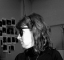

In [5]:
# Print a random image from the list to ensure the import was successful
images[40]

## Part 2: Preprocessing

In [6]:
# Check the size of the second image
images[1].size

(32, 30)

In [7]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in images])
sizes

{(32, 30), (64, 60), (128, 120)}

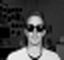

In [9]:
# Use a for loop to resize all images to 64 by 60
target_size = (64, 60)

resized_images = [img.resize(target_size, resample = Image.LANCZOS) for img in images]
resized_images[1]

In [10]:
# Verify the resizing of all images
# Get all the sizes into a list, then convert to a set
sizes = set([img.size for img in resized_images])
sizes

{(64, 60)}

In [12]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[21. 19. 19. ... 45. 45. 43.]
 [47. 43. 33. ... 45. 45. 45.]
 [64. 66. 75. ... 45. 45. 43.]
 ...
 [50. 43. 40. ...  0.  0.  0.]
 [49. 43. 33. ...  0.  0.  0.]
 [49. 47. 33. ... 29.  0.  0.]]


In [13]:
# To normalize images to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[0.08235294 0.07450981 0.07450981 ... 0.1764706  0.1764706  0.16862746]
 [0.18431373 0.16862746 0.12941177 ... 0.1764706  0.1764706  0.1764706 ]
 [0.2509804  0.25882354 0.29411766 ... 0.1764706  0.1764706  0.16862746]
 ...
 [0.19607843 0.16862746 0.15686275 ... 0.         0.         0.        ]
 [0.19215687 0.16862746 0.12941177 ... 0.         0.         0.        ]
 [0.19215687 0.18431373 0.12941177 ... 0.11372549 0.         0.        ]]


# Part 3: Labels

In [14]:
# Print the first few image filenames
filenames_df.head()

,files
0,ch4f_straight_angry_sunglasses.png
1,tammo_straight_neutral_sunglasses.png
2,at33_straight_neutral_open.png
3,boland_up_angry_open.png
4,mitchell_straight_angry_sunglasses.png


In [15]:
# First, remove the .png file extension, then split into four new columns.
filenames_df[['userid', 'pose', 'expression', 'eyes']] = filenames_df['files']\
                                                            .str.replace('.png', '', regex=False)\
                                                            .str.split('_', expand=True)
filenames_df.head()

,files,userid,pose,expression,eyes
0,ch4f_straight_angry_sunglasses.png,ch4f,straight,angry,sunglasses
1,tammo_straight_neutral_sunglasses.png,tammo,straight,neutral,sunglasses
2,at33_straight_neutral_open.png,at33,straight,neutral,open
3,boland_up_angry_open.png,boland,up,angry,open
4,mitchell_straight_angry_sunglasses.png,mitchell,straight,angry,sunglasses


In [ ]:
# Now we can call our preprocessed pixel data 'X'
X = normalized_images

# For our purposes, we'll select the userid column as 'y'
y = np.array(filenames_df['userid'])

In [30]:
# Check the total number of classes
y.nunique()

20

In [31]:
# Now we'll split our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Part 4: Augmentation

In [34]:
# Apply augmentation to the whole training dataset
# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (degrees)
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=False,    # No vertical flip for face images
    fill_mode='nearest'     # Fill mode for handling newly created pixels
)

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    # Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=-1)  # Add channel dimension

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(datagen.flow(img, batch_size=1).next()[0])
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))



2340
2340


In [69]:
# Reshape test data for the model
X_test_np = []
for img in X_test:
    # Add a channel dimension for grayscale images
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    # Append the image to the list
    X_test_np.append(img)

# Convert to numpy array
X_test_np = np.array(X_test_np)

# Check the shape of the first image
X_test_np[0].shape

(60, 64, 1)

# Part 5: Creating the Model

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One hot encode the y data
y_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_aug_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y_test_enc = y_encoder.transform(np.array(y_test).reshape(-1, 1))

# Convert values to numpy arrays
X_train_aug_np = np.array(X_train_aug)
X_test_np = np.array(X_test_np)
y_train_aug_np = np.array(y_train_aug_enc)
y_test_np = np.array(y_test_enc)

# Load and preprocess your CMU Face Images dataset (Ensure each image is labeled as "with sunglasses" or "without sunglasses")
# The following code assumes that you have already loaded and preprocessed your dataset into 'X' and 'y' (features and labels).

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug_np, test_size=0.2, random_state=42)

# Print the total number of one_hot_encoded columns
np.array(y_train).shape

(1872, 20)

In [59]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(60, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='sigmoid')  # 20 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

Epoch 1/10
59/59 [==============================] - 15s 203ms/step - loss: 2.7957 - accuracy: 0.1458 - val_loss: 2.3275 - val_accuracy: 0.2778
Epoch 2/10
59/59 [==============================] - 10s 177ms/step - loss: 1.8440 - accuracy: 0.4033 - val_loss: 1.4466 - val_accuracy: 0.5235
Epoch 3/10
59/59 [==============================] - 11s 188ms/step - loss: 1.1526 - accuracy: 0.6090 - val_loss: 1.0405 - val_accuracy: 0.6496
Epoch 4/10
59/59 [==============================] - 12s 200ms/step - loss: 0.7872 - accuracy: 0.7313 - val_loss: 0.9370 - val_accuracy: 0.7009
Epoch 5/10
59/59 [==============================] - 12s 199ms/step - loss: 0.5534 - accuracy: 0.8125 - val_loss: 0.7225 - val_accuracy: 0.7799
Epoch 6/10
59/59 [==============================] - 11s 180ms/step - loss: 0.3942 - accuracy: 0.8568 - val_loss: 0.7605 - val_accuracy: 0.7564
Epoch 7/10
59/59 [==============================] - 11s 189ms/step - loss: 0.3026 - accuracy: 0.8964 - val_loss: 0.6445 - val_accuracy: 0.8077

In [70]:
model.evaluate(X_test_np, y_test_np)

5/5 [==============================] - 0s 43ms/step - loss: 0.1278 - accuracy: 0.9487


[0.12779109179973602, 0.9487179517745972]